<a href="https://colab.research.google.com/github/gabrilopes12/AnaliseIBM/blob/main/analiseIBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos dados do RH da IBM que foram disponibilizados no site Kaggle.
Queremos entender o perfil dos funcionários que deixam a empresa, afim de diminuir custos operacionais


In [62]:
# 1. Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [63]:
# 2. Carregando o Dataset do Kaggle
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
# 3. Análisando o dataset

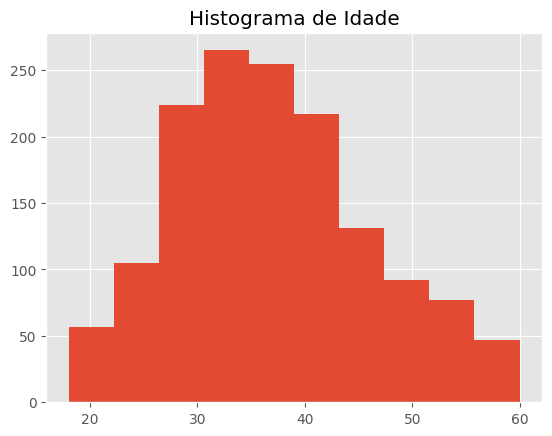

In [65]:
_ = plt.hist(df.Age)
_ = plt.title('Histograma de Idade')
# Grande parte dos funcionários possuem de 30 a 40 anos

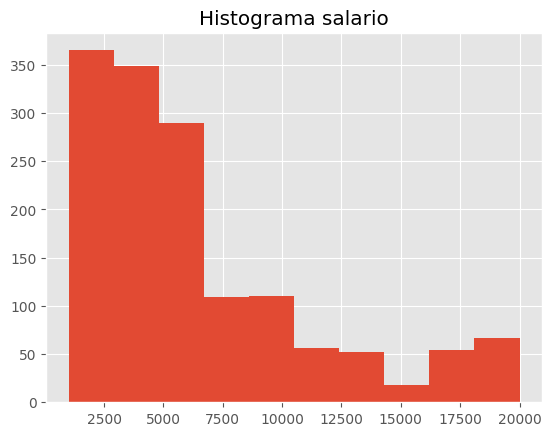

In [66]:
_ = plt.hist(df.MonthlyIncome)
_ = plt.title("Histograma salario")
# Podemos concluir que grande parte dos funcionários
# recebem de 2500 a 5000 mil reais

In [67]:
df.Gender.value_counts()

,count
Gender,
Male,882
Female,588


In [68]:
df.Gender.value_counts(1)

,proportion
Gender,
Male,0.6
Female,0.4


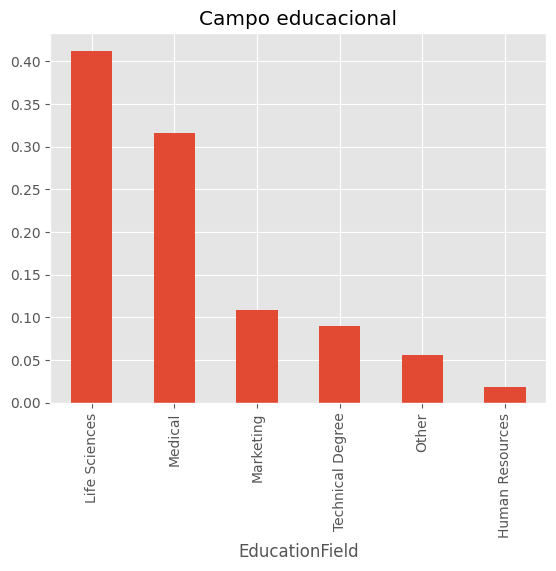

In [69]:
_ = df.EducationField.value_counts(1).plot.bar()
_ = plt.title("Campo educacional")
#Podemos notar que a maioria dos funcionarios é da área de Life Sciences
#A menor parte é da área de Resources

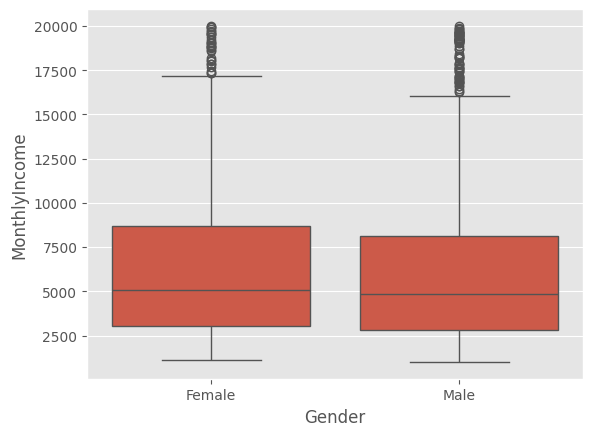

In [70]:
# 4. Fazendo Análises Bivariada
_ = sns.boxplot(x ='Gender', y='MonthlyIncome', data=df)
#Podemos perceber que a distribuição salarial é parecida
#Normalmente homens recebem mais, neste caso não oque ocorre

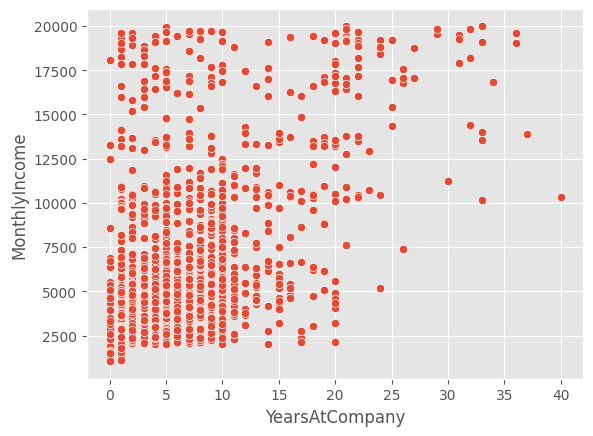

In [71]:
_ = sns.scatterplot(x='YearsAtCompany', y= 'MonthlyIncome', data=df)
#Podemos nota que algumas pessoas mais velhas estão ganhando o mesmo que
#pessoas mais novas

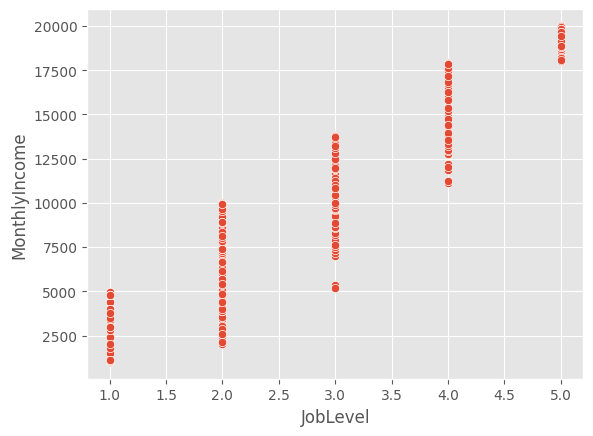

In [72]:
_ = sns.scatterplot(x='JobLevel', y= 'MonthlyIncome', data=df)
#Podemos analisar que quanto maior o nível de complexidade do trabalho, maior o salário

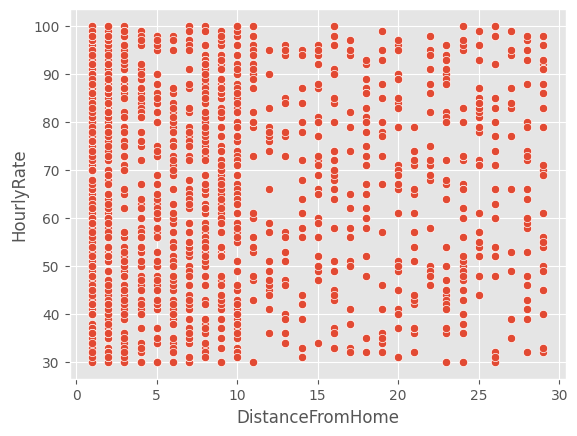

In [82]:
_ = sns.scatterplot(x='DistanceFromHome', y= 'HourlyRate', data=df)
#Percebemos que quanto mais longe de casa, mais a pessoa ganha por hora


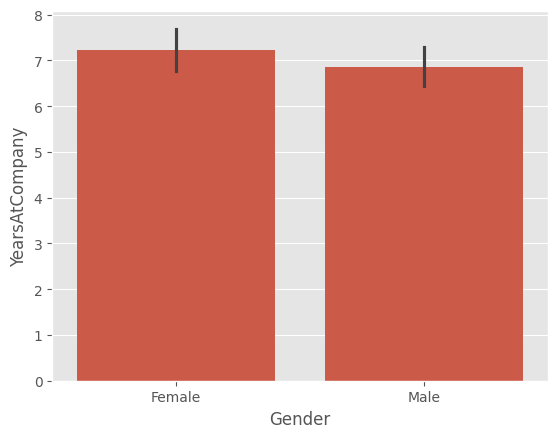

In [75]:
_ = sns.barplot(x='Gender', y='YearsAtCompany', data=df)
plt.show()

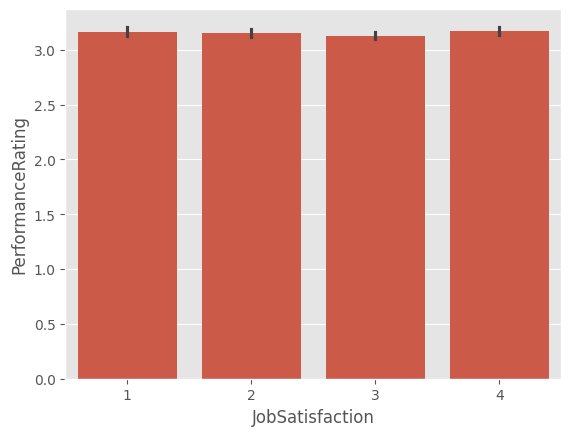

In [79]:
_ = sns.barplot(x='JobSatisfaction', y='PerformanceRating', data=df)


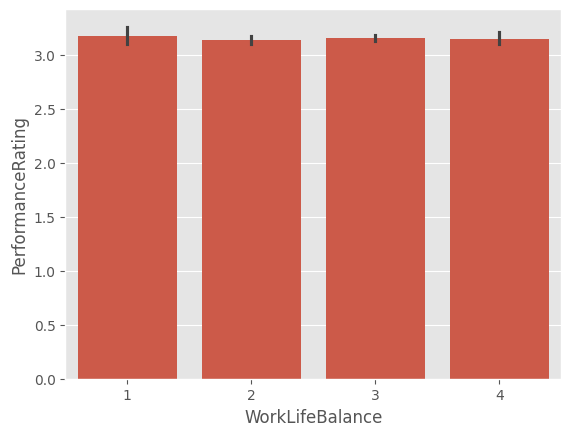

In [80]:
_ = sns.barplot(x='WorkLifeBalance', y='PerformanceRating', data=df)


In [84]:
print(df['MaritalStatus'].head())

0     Single
1    Married
2     Single
3    Married
4    Married
Name: MaritalStatus, dtype: object


In [85]:
df['MaritalStatus'] = df['MaritalStatus'].map({'Single': 0, 'Married': 1})

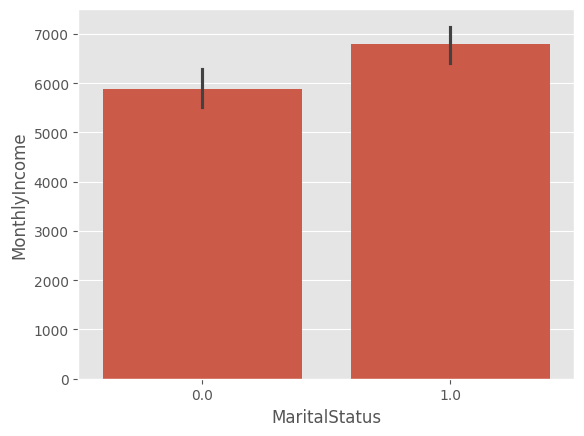

In [95]:
_ = sns.barplot(x='MaritalStatus', y='MonthlyIncome', data=df)
#Pessoas casadas ganham um pouco mais

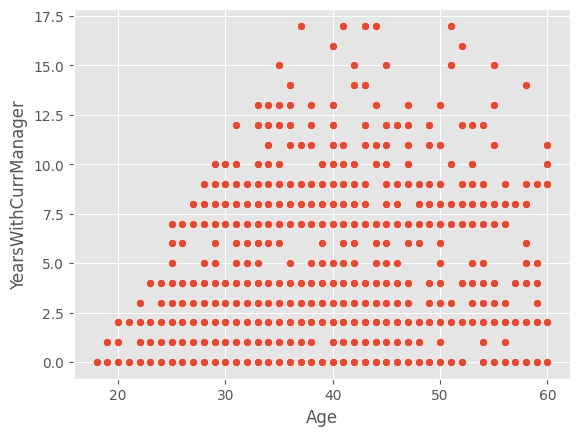

In [102]:
_ = sns.scatterplot(x='Age', y= 'YearsWithCurrManager', data=df)
# Quanto tempo passou com o mesmo gerente

In [21]:
# 5. Fazendo análises Multivariada
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


Algumas possiveis conclusões
- Como a área de Human Resources é a que menos possui trabalhadores, vale a investigação para conferir se realmente são necessários
- Quanto maior o nível do trabalho, maior o salário, então caso queiram reduzir custos, podem divir este trabalho mais complexo em diversas partes o tornando um trabalho mais simples
- Procure pessoa que moram proximos a região se quiserem baratear o valor pago por hora
- Notamos que pessoas casadas ganham um pouco mais
- Pessoas mais velhas, tendem a ficar mais tempo com o mesmo gerente, sendo assim temos uma hipotese de que elas possuem um desempenho maior, ou talvez gerem menos problemas